**Supervised Learning**

**A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.**

**Importing all Libraries**

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**1. Data Understanding and Preparation**

A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [7]:
Data1 = pd.read_csv('/content/drive/MyDrive/Part2_Data1.csv')
Data2 = pd.read_csv('/content/drive/MyDrive/Part2_Data2.csv')

B. Print shape and Column Names and DataTypes of both the Dataframes.

In [8]:
Data1.shape

(5000, 8)

In [9]:
Data2.shape

(5000, 7)

Both the data frames have 5000 rows but Data1 has 8 columns when compared to Data2 which indicates that there is no target variable in Data2

C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [10]:
new_data=Data1.merge(Data2,left_on='ID',right_on='ID')

In [11]:
new_data.shape

(5000, 14)

Final Dataframe has 14 columns and 5000 rows

D. Change Datatype of below features to ‘Object’

‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [12]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard','LoanOnCard']
for i in col:
    new_data[i]=new_data[i].astype('category')

In [13]:
new_data.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

We can see that the dataype has been changed as category for few variables

**2. Data Exploration and Analysis:**

A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

<Axes: xlabel='LoanOnCard'>

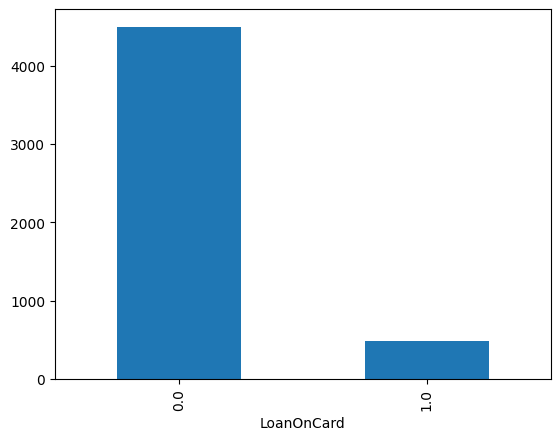

In [14]:
pd.value_counts(new_data["LoanOnCard"]).plot(kind="bar")

We infer that the data is imbalanced as 90% of people does not have loan on credit card

B. Check the percentage of missing values and impute if required

In [15]:
new_data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

As there are very less missing values in the dataset, we will drop those records.

In [16]:
new_data.dropna(axis=0,inplace=True)

In [17]:
new_data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [18]:
new_data.shape

(4980, 14)

All the missing records are dropped

C. Check for unexpected values in each categorical variable and impute with best suitable value.

In [19]:
print("Printing unique values in each column:")
print('')
for col_name in new_data.columns:
    if(col_name!='ID' and col_name!='Age' and col_name!='CustomerSince'and col_name!='HighestSpend' and col_name!='MonthlyAverageSpend'
          and col_name!='ZipCode'):
        print(col_name, ":")
        print('---------------------------------------')
        print(new_data[col_name].value_counts())
        print('')

Printing unique values in each column:

HiddenScore :
---------------------------------------
HiddenScore
1    1466
2    1293
4    1215
3    1006
Name: count, dtype: int64

Level :
---------------------------------------
Level
1    2089
3    1496
2    1395
Name: count, dtype: int64

Mortgage :
---------------------------------------
Mortgage
0      3447
98       17
103      16
89       16
119      16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: count, Length: 347, dtype: int64

Security :
---------------------------------------
Security
0    4460
1     520
Name: count, dtype: int64

FixedDepositAccount :
---------------------------------------
FixedDepositAccount
0    4678
1     302
Name: count, dtype: int64

InternetBanking :
---------------------------------------
InternetBanking
1    2974
0    2006
Name: count, dtype: int64

CreditCard :
---------------------------------------
CreditCard
0    3514
1    1466
Name: count, dtype: int64

LoanOnCard :
---

From above output, we see that there are no unexpected values present in the categorical variables.

Dropping few Independent variables as they don't influence the target variable

In [20]:
new_data.drop(['ID','Age','CustomerSince','ZipCode'],axis=1,inplace=True)

In [21]:
new_data.head()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,180,1,8.9,3,0,0,0,0,0,1.0
10,105,4,2.4,3,0,0,0,0,0,0.0
11,45,3,0.1,2,0,0,0,1,0,0.0
12,114,2,3.8,3,0,1,0,0,0,0.0
13,40,4,2.5,2,0,0,0,1,0,0.0


Let us check if other categorical columns affect the target variable or not.

In [22]:
cat_cols=list(new_data.select_dtypes(include=['category']).columns)

In [23]:
cat_cols

['HiddenScore',
 'Level',
 'Security',
 'FixedDepositAccount',
 'InternetBanking',
 'CreditCard',
 'LoanOnCard']

In [24]:
cat_cols.remove('LoanOnCard')

In [25]:
for i in cat_cols:
    crosstab=pd.crosstab(new_data['LoanOnCard'],new_data[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    print('\n')

 Rejecting Null Hypothesis. 
 There is significant difference in HiddenScore Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in Level Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in Security Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in FixedDepositAccount Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in InternetBanking Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in CreditCard Feature for different category of target variable(Loan on card)




From the above result, we infer that Security, InternetBanking and CreditCard doesn't affect the target variable so they can be removed before model building.

In [26]:
new_data.drop(['Security','CreditCard','InternetBanking'],axis=1,inplace=True)

In [27]:
new_data.head()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount,LoanOnCard
9,180,1,8.9,3,0,0,1.0
10,105,4,2.4,3,0,0,0.0
11,45,3,0.1,2,0,0,0.0
12,114,2,3.8,3,0,0,0.0
13,40,4,2.5,2,0,0,0.0


Checking for outliers in the data before building model

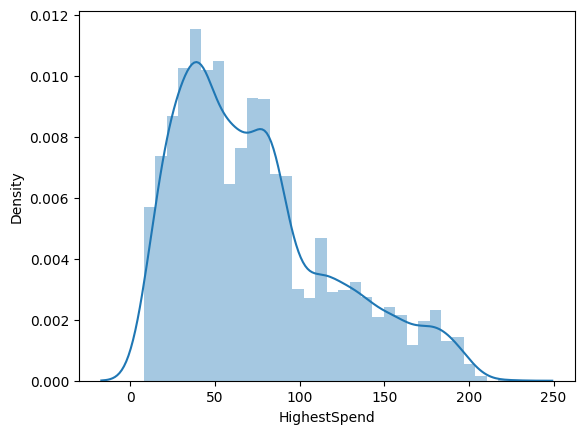

In [28]:
sns.distplot(new_data['HighestSpend']);

<Axes: xlabel='MonthlyAverageSpend'>

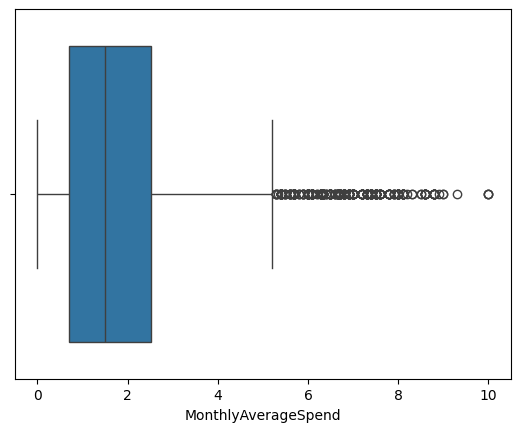

In [29]:
sns.boxplot(x = 'MonthlyAverageSpend', data = new_data)

<Axes: xlabel='Mortgage'>

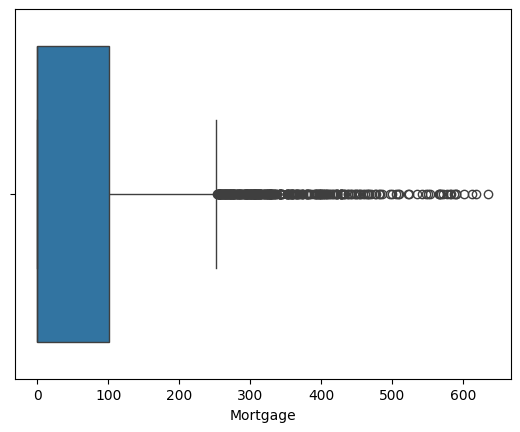

In [30]:
sns.boxplot(x = 'Mortgage', data= new_data)

We can clearly see that the data for above three features is highly right skewed because of the outliers.

**3. Data Preparation and model building:**

A. Split data into X and Y

In [31]:
x=new_data.drop(columns='LoanOnCard')
y=new_data['LoanOnCard']

B. Split data into train and test. Keep 25% data reserved for testing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

C. Train a Supervised Learning Classification base model - Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9443105756358768
Accuracy on Test data: 0.9518072289156626


94.43% accuracy on training set and 95.18% accuracy on test set.
Here training set accuracy and testing accuracy are balanced.

D. Print evaluation metrics for the model and clearly share insights.

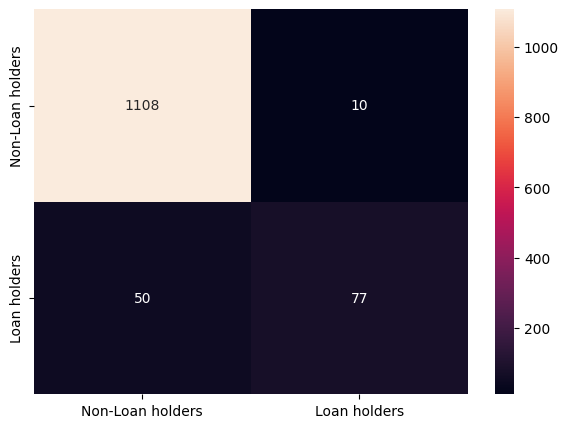

In [35]:
cm = confusion_matrix(y_test, logit_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

Only 10 are predicted wrongly as Loan Holders and 50 were predicted wrongly as Non-Loan holders

In [36]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1118
         1.0       0.89      0.61      0.72       127

    accuracy                           0.95      1245
   macro avg       0.92      0.80      0.85      1245
weighted avg       0.95      0.95      0.95      1245



Here you can see model is poor in predicting class 1 compared to class 0 Accuracy is good but in this case we need to look on recall value

Here Recall tells that very less percentage of class 1 is predicted correctly from actual values We dont have enough sample of class 1 to train the model.

Recall score can be improved by resampling the training set as the dataset is imbalanced.

E. Balance the data using the right balancing technique. i. Check distribution of the target variable ii. Say output is class A : 20% and class B : 80% iii. Here you need to balance the target variable as 50:50. iv. Try appropriate method to achieve the same.

<Axes: xlabel='LoanOnCard', ylabel='count'>

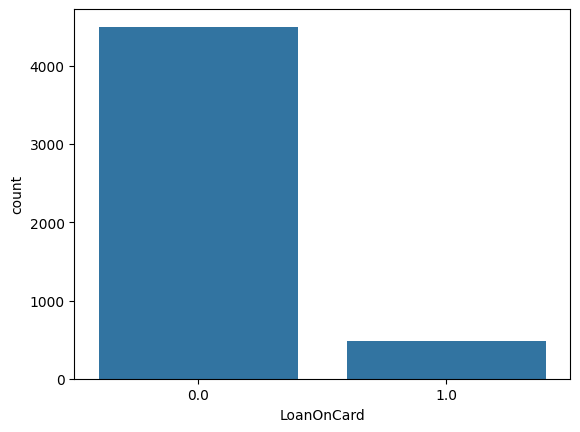

In [37]:
sns.countplot(x = 'LoanOnCard',data=new_data)

There is huge imbalance in target variable.

In [38]:
#Use label encoder to convert categorical variables to one-hot encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_data['LoanOnCard']=le.fit_transform(new_data['LoanOnCard'])
new_data['LoanOnCard'].value_counts()

LoanOnCard
0    4500
1     480
Name: count, dtype: int64

We can clearly see that the data is imbalanced which may lead to predicting Non-Loan holders.

Class Imbalance can be improved by using resampling techniques such as -

Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

Here we will use oversampling because undersampling may remove important information from the dataset.

**SMOTE**

We will be using SMOTE (Synthetic Minority Oversampling Technique) that works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

If we do resampling on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.

In [39]:
from imblearn.over_sampling import SMOTENC

In [40]:
smotenc = SMOTENC(categorical_features=[1,3,4,5],random_state = 10)
x_res, y_res = smotenc.fit_resample(X_train, y_train)

In [41]:
print('Before sampling:')
print(y_train.value_counts())

Before sampling:
LoanOnCard
0.0    3382
1.0     353
Name: count, dtype: int64


In [42]:
print('After sampling:')
print(y_res.value_counts())

After sampling:
LoanOnCard
0.0    3382
1.0    3382
Name: count, dtype: int64


Now the target variable is balanced.

F. Again train the same previous model on balanced data.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.25, random_state=10)

In [44]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9012418687167356
Accuracy on Test data: 0.9030159668835009


we can see there is decrease in test accuracy.

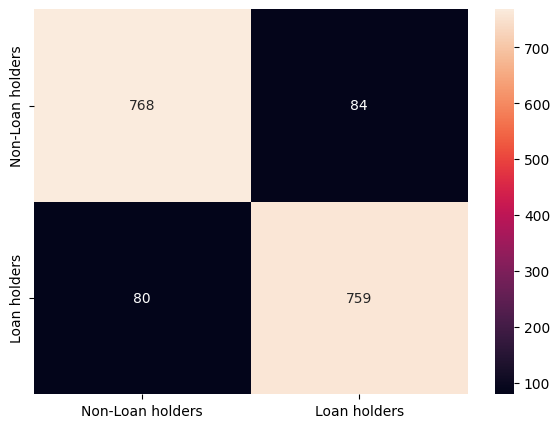

In [45]:
cm2 = confusion_matrix(y_test, logit_pred, labels=[0, 1])

data_cm2 = pd.DataFrame(cm2, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm2, annot=True ,fmt='g')
plt.show()

G. Print evaluation metrics and clearly share differences observed

In [46]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       852
         1.0       0.90      0.90      0.90       839

    accuracy                           0.90      1691
   macro avg       0.90      0.90      0.90      1691
weighted avg       0.90      0.90      0.90      1691



After running the same model on the balanced data, we can see that the accuracy has reduced However, we get a good recall value but the precision value is reduced

**4. Performance Improvement**

A. Train a base model each for SVM, KNN

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(X_train , y_train)
pred=svc.predict(X_test)
print('Model accuracy obtained using SVM is: {0:0.3f}'. format(accuracy_score(y_test, pred)))

Model accuracy obtained using SVM is: 0.882


In [48]:
print("classification  Matrix:\n",classification_report(y_test,pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.88       852
         1.0       0.85      0.93      0.89       839

    accuracy                           0.88      1691
   macro avg       0.89      0.88      0.88      1691
weighted avg       0.89      0.88      0.88      1691



In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' )
KNN.fit(X_train , y_train)
predicted_labels = KNN.predict(X_test)


In [51]:
print('Accuracy on Training data:',KNN.score(X_train, y_train))
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.9631381825349892
Accuracy on Test data: 0.9343583678296866


In [52]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.93       852
         1.0       0.90      0.97      0.94       839

    accuracy                           0.93      1691
   macro avg       0.94      0.93      0.93      1691
weighted avg       0.94      0.93      0.93      1691



B. Tune parameters for each of the models wherever required and finalize a model.

In [53]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn_2 = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [5,10,20,30],
              'weights': ['uniform', 'distance'],
              'metric' : ['minkowski','euclidean','manhattan']}

# Run the grid search
from sklearn.model_selection import GridSearchCV
grid_obj = GridSearchCV(knn_2, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn_2 = grid_obj.best_estimator_

# Train the model using the training sets
knn_2.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [54]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   3.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   2.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   1.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.918 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.902 total time=   1.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.895 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.897 total time=   0.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   0.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.876 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [55]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


C. Print evaluation metrics for final model.

In [56]:
from sklearn import metrics
y_pred = knn_2.predict(X_test)
# Calculating the accuracy
acc_knn_2 = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn_2 )

Accuracy of KNN model :  95.56


In [57]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       852
         1.0       0.97      0.97      0.97       839

    accuracy                           0.97      1691
   macro avg       0.97      0.97      0.97      1691
weighted avg       0.97      0.97      0.97      1691



D. Share improvement achieved from base model to final model.

After hyperparameter tuning, we observe that the accuracy has increased from 93% to 95% using KNN algorithm with metric='manhattan', weights='distance' parameters.
We see that the hyperparameter tuning has improved accuracy from 88% to 97% using SVC algorithm
We are selecting final model as KNN as it performs well in training and testing test. It is also has good recall value after hyperparameter tuning. Sampling improved to predict minority classes as well Data should be collected equally for all the classes. Few customers does't have credit card but those customer having loan on card. This data error can be avoided